# Airbags e outras influências em acidentes fatais 
   ### por Arthur Um, Lucas Lai, e Fernando Chiu


<p style="font-family: Times New Roman; font-size:18px;">I am big</p>


Fonte: National Highway Traffic Safety Administration - uma agência do poder executivo do governo dos EUA, parte do Departamento de Transporte. 
   - NASSCDS - National Automotive Sampling System e o seu Crashworthiness Data System
     - casos selecionados a partir de relatórios de acidentes(batidas) de carro da polícia 
     - melhorias no design de veículos

‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌
‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌‌
Dados de 1997-2002 sobre acidentes de carro nos EUA em quais ocorreram algum evento prejudicial às vítimas ou suas propriedades, e em que pelo menos um dos veículos envolvidos teve que ser tirado a guincho. A coleção de dados foi realizada através de um esquema de amostragem multiestágio: a população foi dividida em grupos(clusters) e aleatoriamente selecionadas em etapas posteriores. Os dados estão limitados a apenas os passageiros que sentaram nos bancos dianteiros do carro, entre outras limitações.  


In [1]:
library(ggplot2)
library(gmodels)
library(rpivotTable)
options(warn=-1)

In [2]:
df<-read.csv("Car accidents.csv")
str(df)

'data.frame':	26217 obs. of  16 variables:
 $ X          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ dvcat      : Factor w/ 5 levels "1-9km/h","10-24",..: 3 2 2 3 3 4 5 5 2 2 ...
 $ weight     : num  25.1 25.1 32.4 495.4 25.1 ...
 $ dead       : Factor w/ 2 levels "alive","dead": 1 1 1 1 1 1 1 2 1 1 ...
 $ airbag     : Factor w/ 2 levels "airbag","none": 2 1 2 1 2 2 2 2 2 2 ...
 $ seatbelt   : Factor w/ 2 levels "belted","none": 1 1 2 1 1 1 1 2 1 1 ...
 $ frontal    : int  1 1 1 1 1 1 1 1 0 1 ...
 $ sex        : Factor w/ 2 levels "f","m": 1 1 1 1 1 1 2 2 2 1 ...
 $ ageOFocc   : int  26 72 69 53 32 22 22 32 40 18 ...
 $ yearacc    : int  1997 1997 1997 1997 1997 1997 1997 1997 1997 1997 ...
 $ yearVeh    : int  1990 1995 1988 1995 1988 1985 1984 1987 1984 1987 ...
 $ abcat      : Factor w/ 3 levels "deploy","nodeploy",..: 3 1 3 1 3 3 3 3 3 3 ...
 $ occRole    : Factor w/ 2 levels "driver","pass": 1 1 1 1 1 1 1 1 1 1 ...
 $ deploy     : int  0 1 0 1 0 0 0 0 0 0 ...
 $ injSeverity: int  3 1 4 1 3

In [3]:
df$X <- NULL #inutil
df$caseid<-NULL  #inutil
df$dvcat<- as.character(df$dvcat)
df$dvcat[df$dvcat == "1-9km/h"] <- "1-9"
df$dvcat <- as.factor(df$dvcat)

 _dvcat_ - velocidade do impacto estimado (1-9, 10-24, 25-39, 40-54, e 55+ em km/h). **Quantitativa Ordinal**

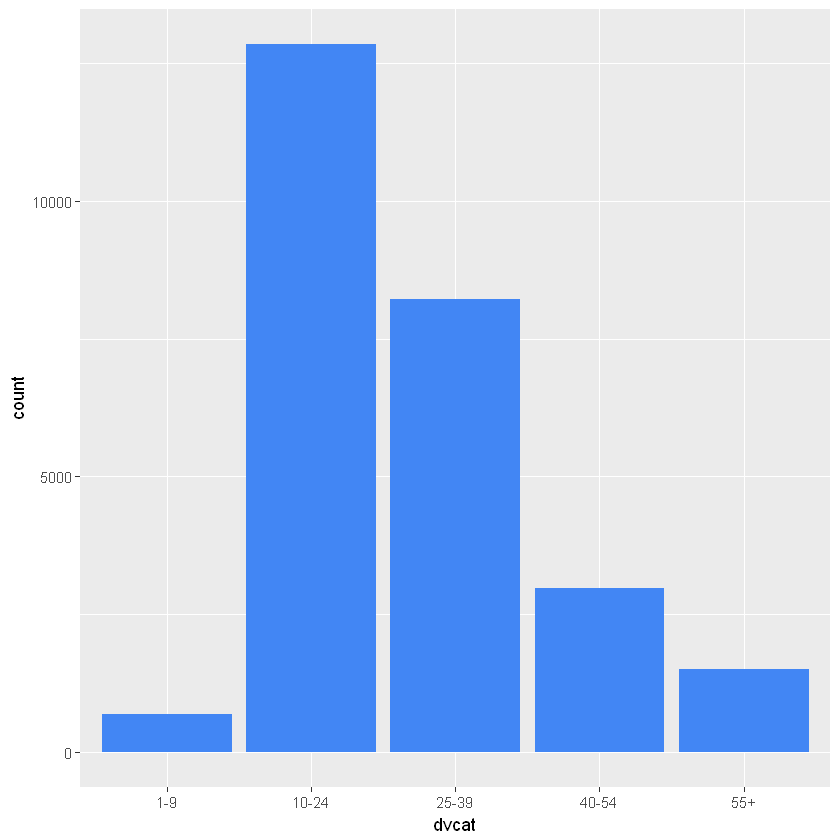

In [4]:
ggplot(df,aes(dvcat)) + geom_histogram(stat="count",fill="#4286f4")

_dead_ - se a vítima observada faleceu ou não (alive, dead). **Qualitativa Dicotômica**

In [5]:
table(df$dead)



alive  dead 
25037  1180 

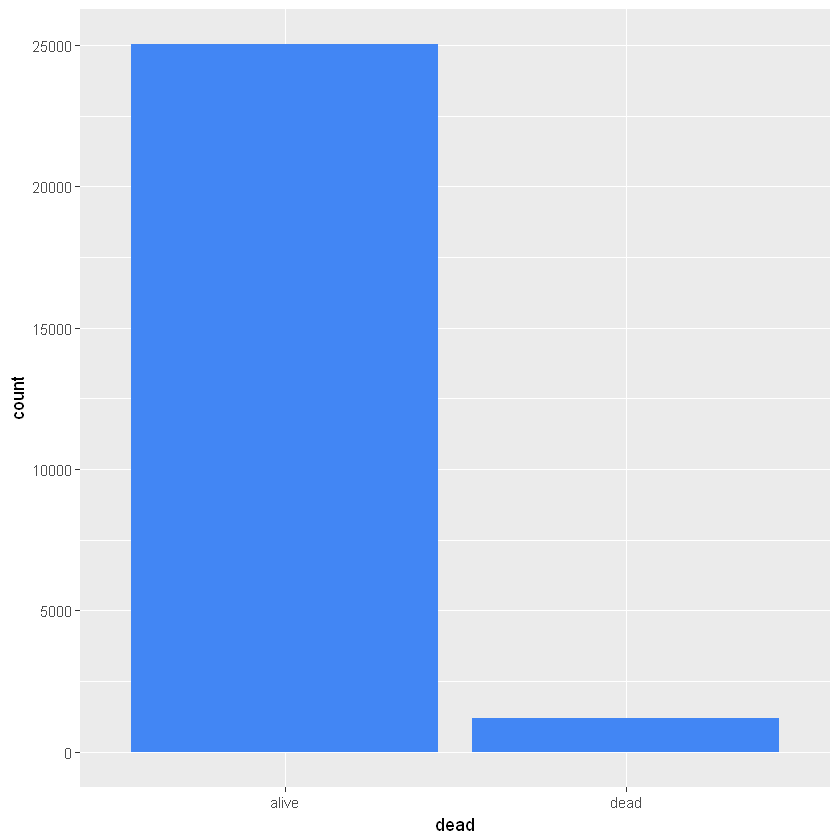

In [6]:
ggplot(df,aes(dead)) + geom_histogram(stat="count",fill="#4286f4")

_seatbelt_ - se a vítima observada estava com cinto ou não (belted, none). **Qualitativa Dicotômica**

_frontal_ - se o impacto da observação foi frontal ou não (numérico;  0 = não frontal, 1 = frontal). **Qualitativa Dicotômica**

_occRole_ - papel do ocupante da observação (driver,pass - motorista ou passageiro). **Qualitativa Dicotômica** 

In [7]:
table(df$seatbelt)
table(df$frontal)
table(df$occRole)


belted   none 
 18573   7644 


    0     1 
 9351 16866 


driver   pass 
 20601   5616 

_abcat_ - um ou mais airbags foram ativados(seja motorista ou passageiro)? (deploy, nodeploy, unavail). **Qualitativa Nominal**

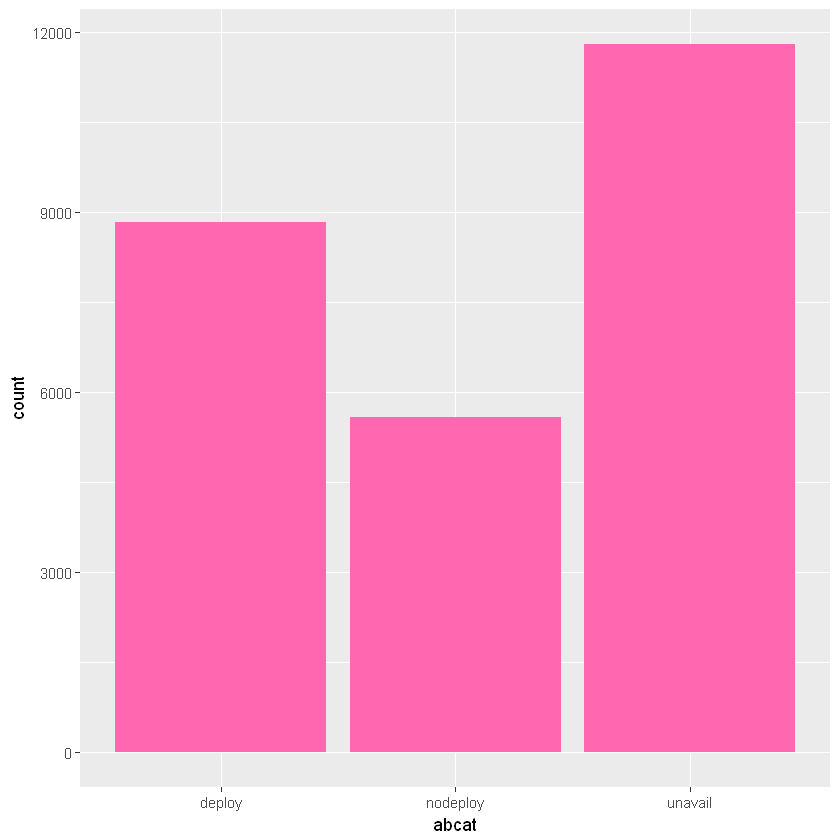

In [8]:
ggplot(df,aes(abcat)) + geom_histogram(stat="count",fill="#ff68b1") 

_injSeverity_ - severidade do ferimento da vítima observada, numérico. **Qualitativa Ordinal**
 - 0: nenhum 
 - 1: possivelmente ferido 
 - 2: sem incapacitação
 - 3: incapacitado 
 - 4: morto 
 - 5: desconhecido
 - 6: morte anterior (ao acidente). 

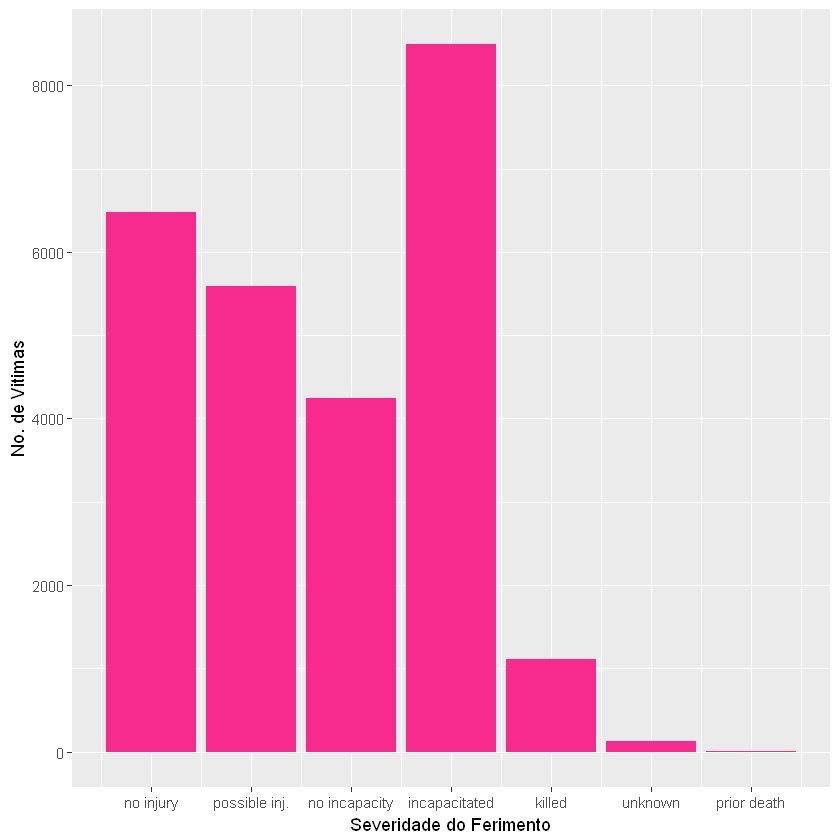

In [9]:
names <- c("no injury","possible inj.","no incapacity","incapacitated","killed","unknown","prior death")
ggplot(df,aes(injSeverity)) + geom_histogram(stat="count",fill="#f72a8d") +xlab("Severidade do Ferimento")+ ylab("No. de Vitimas") + scale_x_continuous(labels = names,breaks=c(0,1,2,3,4,5,6))

_weight_ - os pesos das observações, porém com incerteza na precisão dos mesmos. **Quantitativa Contínua**

 _airbag_ - se o veículo observado possuía airbag ou não (none, airbag). **Qualitativa Dicotômica** 

_sex_ - sexo da vítima observada (f,m). **Qualitativa Dicotômica**

_yearacc_ - ano em que o acidente ocorreu. **Quantitativa Discreta**

_yearVeh_ - ano do modelo do carro. **Quantitativa Contínua**

_deploy_ - mesmo que abcat, porém numérico (0 caso não houve airbag, 1 caso houve). **Qualitativa Dicotômica** 

In [10]:
trivialdf<-df
trivialdf$dvcat<-NULL
trivialdf$seatbelt<-NULL
trivialdf$frontal<-NULL
trivialdf$dead<-NULL
trivialdf$ageOFocc<-NULL
trivialdf$abcat<-NULL
trivialdf$occRole<-NULL
trivialdf$injSeverity<-NULL

In [11]:
aux<-as.matrix(unclass(summary(trivialdf)))
aux<- aux[-7,]
aux

,weight,airbag,sex,yearacc,yearVeh,deploy
,Min. : 0.00,airbag:14419,f:12248,Min. :1997,Min. :1953,Min. :0.000
,1st Qu.: 32.47,none :11798,m:13969,1st Qu.:1998,1st Qu.:1989,1st Qu.:0.000
,Median : 86.99,NA,NA,Median :2000,Median :1994,Median :0.000
,Mean : 462.81,NA,NA,Mean :2000,Mean :1993,Mean :0.337
,3rd Qu.: 364.72,NA,NA,3rd Qu.:2001,3rd Qu.:1997,3rd Qu.:1.000
,Max. :57871.59,NA,NA,Max. :2002,Max. :2003,Max. :1.000


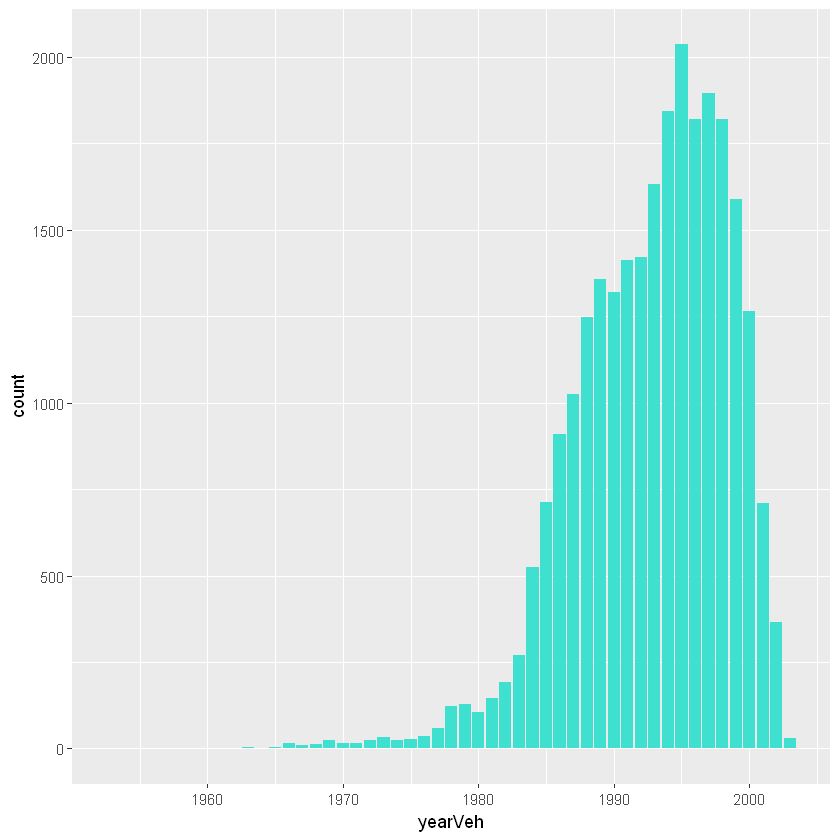

In [12]:
ggplot(df,aes(yearVeh)) +geom_histogram(stat="count",fill="turquoise")

In [13]:
dvdead=CrossTable(df$dvcat,df$dead)$t


 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  26217 

 
             | df$dead 
    df$dvcat |     alive |      dead | Row Total | 
-------------|-----------|-----------|-----------|
         1-9 |       683 |         3 |       686 | 
             |     1.186 |    25.168 |           | 
             |     0.996 |     0.004 |     0.026 | 
             |     0.027 |     0.003 |           | 
             |     0.026 |     0.000 |           | 
-------------|-----------|-----------|-----------|
       10-24 |     12734 |       114 |     12848 | 
             |    17.568 |   372.749 |           | 
             |     0.991 |     0.009 |     0.490 | 
             |     0.509 |     0.097 |           | 
             |     0.486 |     0.004 |           | 
-------------|-----------|-----------|-----

In [14]:
#dvdead=CrossTable(df$dvcat,df$dead)$t#
dvdead<-as.data.frame.matrix(dvdead)
dvdead[,3]<-c("1-9km/h","10-24","25-39","40-54","55+")
colnames(dvdead)[3]<-"dvcat"
deadperc<-dvdead[,2]/1180
dvdead[,4]<-deadperc
colnames(dvdead)[4]<-"deadPercentage"
dvdead

,alive,dead,dvcat,deadPercentage
1-9,683,3,1-9km/h,0.002542373
10-24,12734,114,10-24,0.096610169
25-39,7910,304,25-39,0.257627119
40-54,2633,344,40-54,0.291525424
55+,1077,415,55+,0.351694915


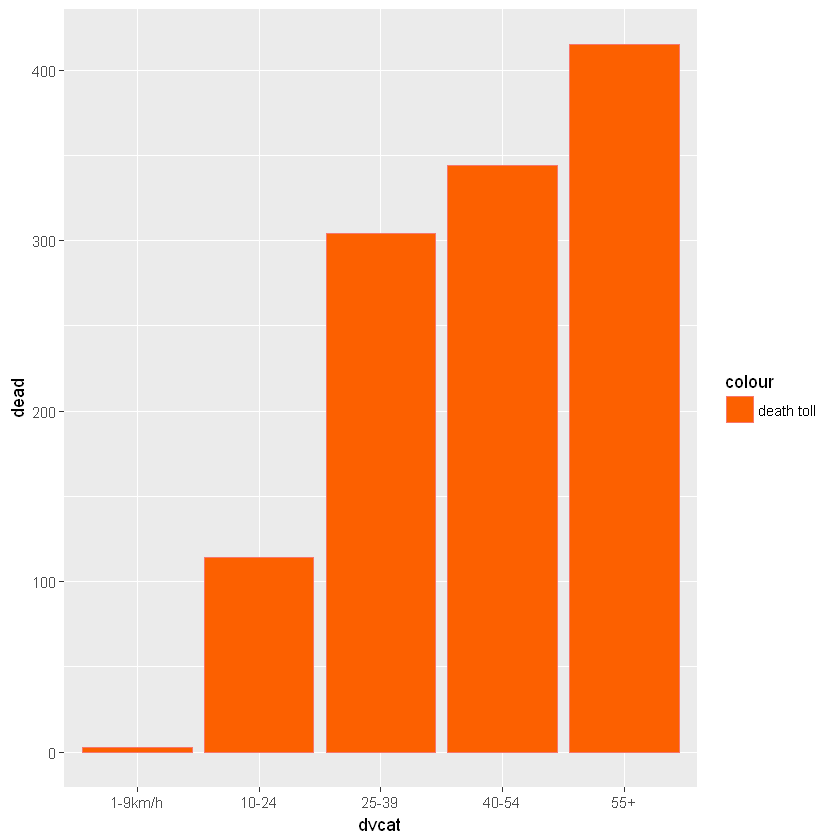

In [15]:
ggplot(dvdead,aes(dvcat)) + geom_bar(stat="identity",aes(y=dead, color="death toll"),fill="#fc6000")

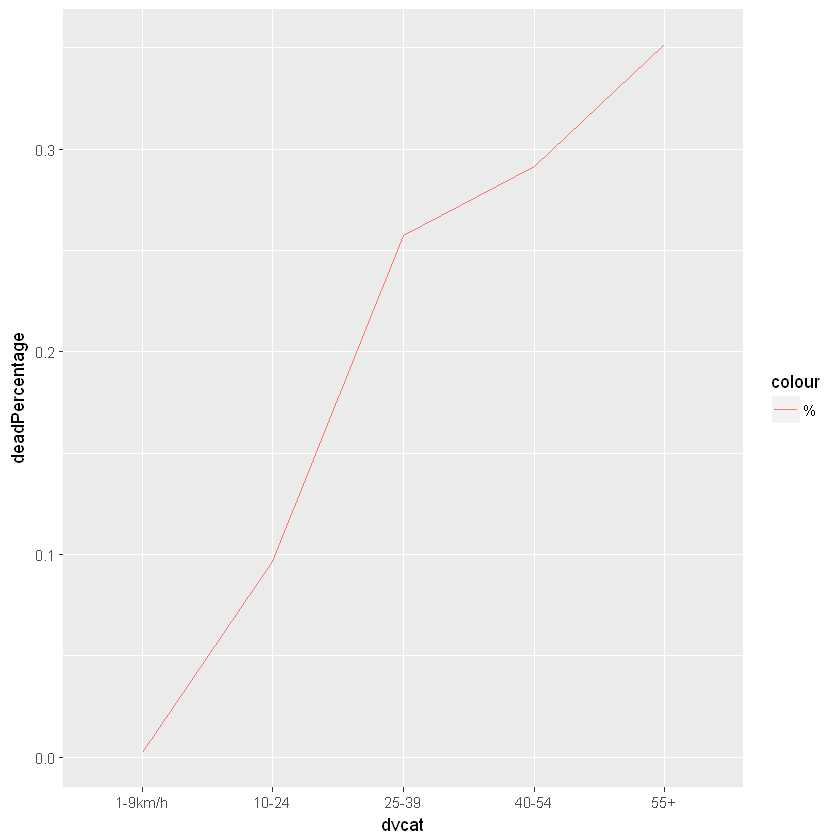

In [16]:
ggplot(dvdead,aes(dvcat)) + geom_line(aes(y=deadPercentage,color="%"),group=1)

In [17]:
message("Rows : dead, Cols: dvcat and seatbelt")
dvseat <- rpivotTable(df,row="dead",col=c("dvcat","seatbelt"),rendererName="Row Heatmap")

Rows : dead, Cols: dvcat and seatbelt


<img src="UniversalCaptureNB.jpg">

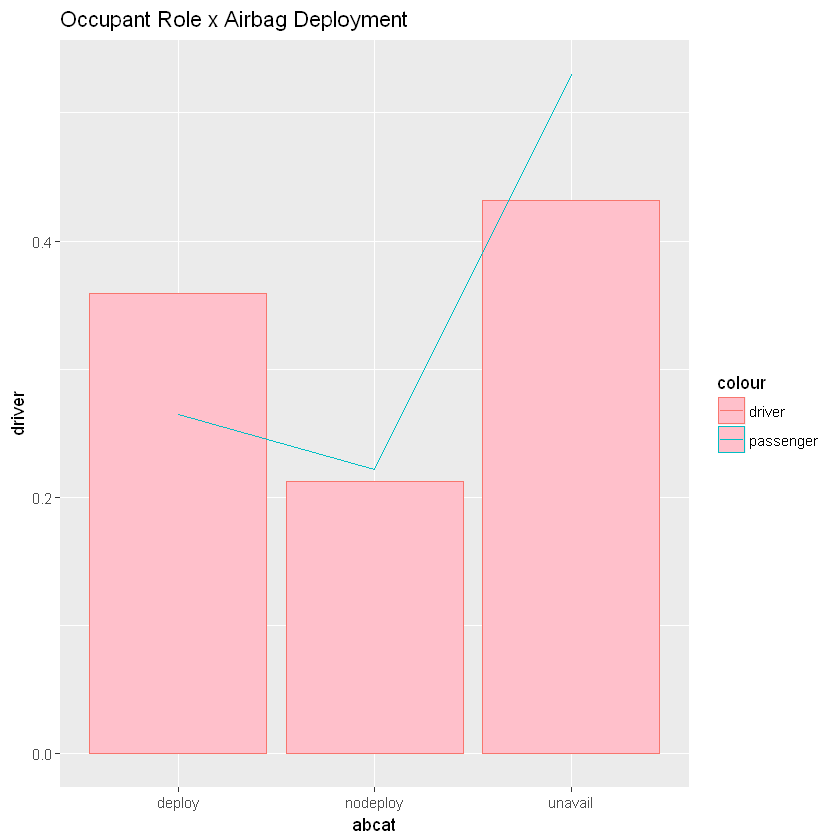

In [18]:
occab<-table(df$abcat,df$occRole)
occab[,1]<-occab[,1]/20541
occab[,2]<-occab[,2]/5522
occab<-as.data.frame.matrix(occab)
occab[,3]<-c("deploy","nodeploy","unavail")
colnames(occab)[3]<-"abcat"
ggplot(occab,aes(abcat)) + geom_bar(stat="identity",aes(y=driver,colour="driver"),fill="pink")+geom_line(aes(y=pass,colour="passenger"),group=1) +ggtitle("Occupant Role x Airbag Deployment")

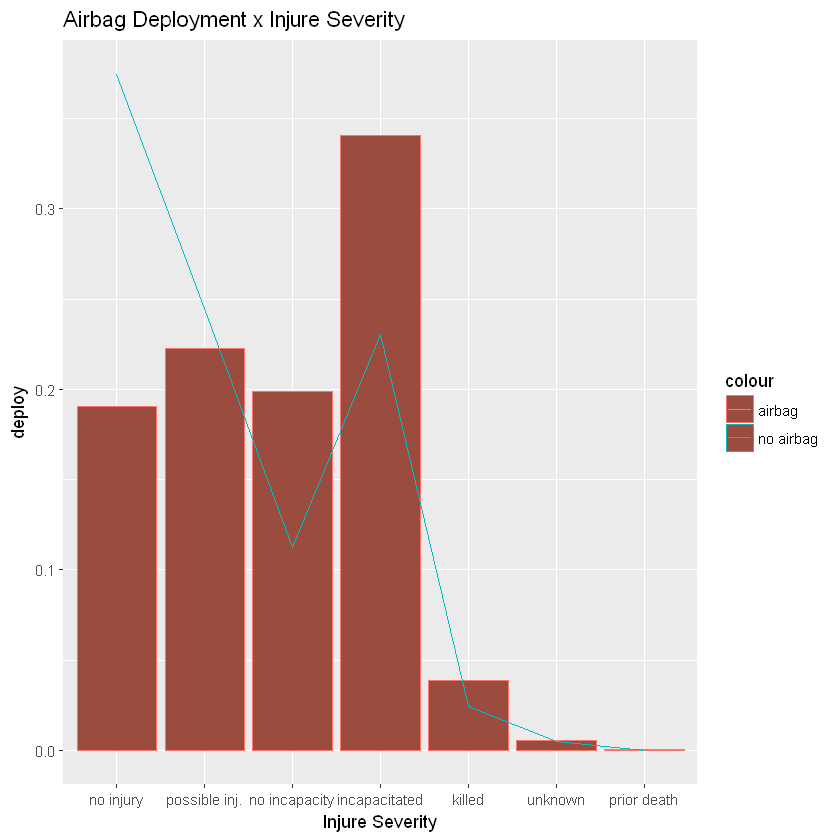

In [19]:
ctt<-table(df$injSeverity,df$abcat)
ctt<-as.data.frame.matrix(ctt)
ctt[,ncol(ctt)+1] <- names
colnames(ctt)[ncol(ctt)]<- "injureSeverity"
ctt$injureSeverity <-factor(ctt$injureSeverity,levels = ctt$injureSeverity)
ctt[,1] <-ctt[,1]/8836 # no. de deployed
ctt[,2] <-ctt[,2]/5583 # no. de nodeploy
ggplot(ctt,aes(x=reorder(injureSeverity,injureSeverity)))+geom_bar(stat="identity",aes(y=deploy,colour="airbag"),fill="#9b4c3f")+geom_line(aes(y=nodeploy,colour="no airbag"),group=1) +xlab("Injure Severity") +ggtitle("Airbag Deployment x Injure Severity") 

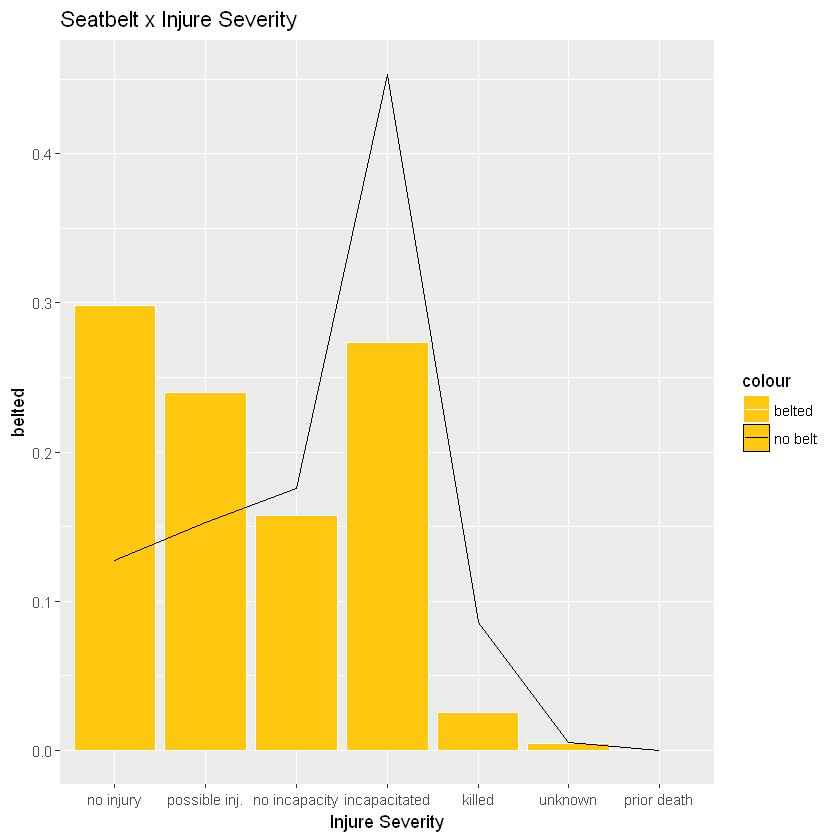

In [20]:
seatinj<-table(df$injSeverity,df$seatbelt)
seatinj<-as.data.frame.matrix(seatinj)
seatinj[,3] <- names
colnames(seatinj)[ncol(seatinj)]<- "injureSeverity"
seatinj$injureSeverity <-factor(seatinj$injureSeverity,levels = seatinj$injureSeverity)
seatinj[,1] <-seatinj[,1]/18465
seatinj[,2] <-seatinj[,2]/7598
ggplot(seatinj,aes(x=reorder(injureSeverity,injureSeverity)))+geom_bar(stat="identity",aes(y=belted,colour="belted"),fill="#ffc70f")+geom_line(aes(y=none,colour="no belt"),group=1)+scale_color_manual(values=c("white","black")) +xlab("Injure Severity") +ggtitle("Seatbelt x Injure Severity") 


- X - numeração das observações
- dvcat - velocidade do impacto estimado (1-9km/h, 10-24, 25-39, 40-54, 55+). **Quantitativa Discreta** 
- weight - os pesos das observações, porém com incerteza na precisão dos mesmos. **Quantitativa Contínua**
- dead - se a vítima observada faleceu ou não (alive, dead). **Qualitativa Dicotômica**
- airbag - se o veículo observado possuía airbag ou não (none, airbag). **Qualitativa Dicotômica**
- seatbelt - se a vítima observada estava com cinto ou não (none, belted). **Qualitativa Dicotômica**
- frontal - se o impacto da observação foi frontal ou não (numérico;  0 = não frontal, 1=frontal). **Qualitativa Dicotômica**
- sex - sexo da vítima observada (f,m). **Qualitativa Dicotômica**
- ageOFocc - idade do ocupante da observação em anos. **Quantitativa Contínua** 
- yearacc - ano em que o acidente ocorreu. **Quantitativa Discreta**
- yearVeh - ano do modelo do carro. **Quantitativa Contínua**
- abcat - um ou mais airbags foram ativados(seja motorista ou passageiro)? (deploy, nodeploy, unavail). **Qualitativa Nominal**
- occRole - papel do ocupante da observação (driver,pass - motorista ou passageiro). **Qualitativa Dicotômica** 
- deploy - mesmo que abcat, porém numérico (0 caso não houve airbag, 1 caso houve). **Qualitativa Dicotômica** 
- injSeverity - severidade do ferimento da vítima observada, numérico; 0:nenhum, 1:possivelmente ferido, 2:incapacitação, 3:incapacitado, 4:morto; 5: desconhecido, 6:morte precedente **Qualitativa Ordinal**
- caseid - tipo: character; populations sampling unit + case number + vehicle number. Podemos utilizá-lo para identificar o veículo como único em cada ano. 


In [38]:
# Contamos o no. de na values em cada coluna
as.matrix(colSums(is.na(df)))

dvcat,0
weight,0
dead,0
airbag,0
seatbelt,0
frontal,0
sex,0
ageOFocc,0
yearacc,0
yearVeh,1
abcat,0


In [4]:
table(is.na(df))
df<-na.omit(df) # Excluimos os valores na
table(is.na(df))
message("No. de obs.:")
nrow(df) # Antes era 26217 


 FALSE   TRUE 
366884    154 


 FALSE 
364882 

No. de obs.:


[1] 26063